## Gym membersexercise tracking

Набор данных содержит подробную информацию о тренировочных режимах, физических характеристиках и фитнес-метриках членов тренажерного зала. В нем представлено 973 записи, каждая из которых включает 15 переменных, таких как возраст, пол, вес, рост, максимальная и средняя частота сердечных сокращений, количество часов тренировок, сожженные калории, тип тренировки, процент жира, содержание воды в организме, количество тренировочных дней в неделю, уровень подготовки и индекс массы тела (BMI).

In [1]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

dataset_name = "gym_members_exercise_tracking.csv"
path = kagglehub.dataset_download("valakhorasani/gym-members-exercise-dataset") + "/" + dataset_name
df = pd.read_csv(path)
df.head(100)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,59,Female,54.6,1.57,164,169,64,0.58,441.0,Cardio,29.2,2.3,3,1,22.15
96,56,Male,129.0,1.78,194,126,64,1.29,805.0,Yoga,27.1,2.7,2,1,40.71
97,58,Male,103.5,1.66,172,168,61,1.33,1106.0,Cardio,24.6,3.1,3,1,37.56
98,45,Female,59.4,1.51,169,142,65,1.15,735.0,Strength,33.1,1.9,4,2,26.05


In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [3]:
df.shape

(973, 15)

# Берем в роли целевого класса метку Workout_Type

Для обоснования выбора именно такого целевого класса можно сказать, что при таком выборе, данный датасет можно использовать для определения типа тренировок по определенным параметрам, такие параметры можно собирать, используя ,например, датчики на смарт часах.

In [7]:
mapping = {'Strength': 1, 'Cardio': 2, 'Yoga': 3, 'HIIT': 4}
y = df['Workout_Type'].map(mapping)
df.head(100)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,58,1,103.5,1.66,172,168,61,1.33,1106.0,Cardio,24.6,3.1,3,1,37.56
98,45,0,59.4,1.51,169,142,65,1.15,735.0,Strength,33.1,1.9,4,2,26.05
100,26,1,77.7,1.62,177,126,73,1.16,804.0,Yoga,29.6,3.0,3,2,29.61
101,25,0,41.2,1.62,193,144,64,1.49,1073.0,Yoga,28.9,2.1,4,2,15.70


## Проверим пустые значения

In [5]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

Пустых значений не обнаружено

## Уберем выбросы

In [6]:
for column in df.columns:
    first_quantile = df[column].quantile(0.25)
    third_quantile = df[column].quantile(0.75)
    iqr = (third_quantile - first_quantile)
    delta = iqr * 1.5
    lower_threshold = first_quantile - delta
    upper_threshold = third_quantile + delta
    df = df[(df[column] >= lower_threshold) & (df[column] <= upper_threshold)]

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [362]:
x.shape, y.shape

((973, 12), (973,))

In [363]:
counts = y.value_counts()
counts

Workout_Type
1    258
2    255
3    239
4    221
Name: count, dtype: int64

In [364]:
counts = list(counts)

In [365]:
for count in counts:
    print(count / sum(counts))

0.26515930113052416
0.2620760534429599
0.24563206577595068
0.22713257965056527


# Вывод о сбалансировании классов

Так как количество элементов разных классов примерно одинакого и нет отдельно доминирующих классов, то можно считать данные сбалансированными

Делим выборку на тестовую и обучающую

In [366]:
from sklearn.model_selection import train_test_split

In [367]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=17)

In [368]:
X_train.shape, X_test.shape

((778, 12), (195, 12))

# Используем методы классификации

In [369]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## Используем grid search для нахождения гиперпараметров

In [370]:
from sklearn.model_selection import GridSearchCV

In [371]:
params = {"max_depth": list(range(1, 15)), "max_features": [0.5, 0.7, 1]}
tree = DecisionTreeClassifier(random_state=17)

In [372]:
grid = GridSearchCV(tree, params, cv=5, n_jobs=-1)

In [373]:
%%time
grid.fit(X_train, Y_train)

CPU times: user 231 ms, sys: 243 ms, total: 474 ms
Wall time: 1.75 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14],
                         'max_features': [0.5, 0.7, 1]})

In [374]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=7, max_features=1, random_state=17)

In [375]:
grid.best_score_

np.float64(0.27633581472291147)

In [376]:
grid.best_params_

{'max_depth': 7, 'max_features': 1}

## Используем KNN

Перед применением knn нужно обработать значения

In [377]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X_train)
for_test = scaler.fit_transform(X_test)
knn_test = pd.DataFrame(for_test, columns=X_test.columns)
knn_df = pd.DataFrame(standardized_data, columns=X_train.columns)

In [378]:
knn_params = {'n_neighbors': list(range(1, 200)), 'metric': ['euclidean', 'manhattan', 'chebyshev']}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=5, n_jobs=-1)


In [379]:
%%time
knn_grid.fit(knn_df, Y_train)

CPU times: user 1.16 s, sys: 85.8 ms, total: 1.24 s
Wall time: 5.88 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [380]:
knn_grid.best_score_

np.float64(0.29313482216708026)

In [381]:
knn_grid.best_params_

{'metric': 'chebyshev', 'n_neighbors': 169}

In [382]:
from sklearn.metrics import accuracy_score

# Посчитаем accuracy

In [383]:
tree_test = grid.predict(X_test)

In [384]:
knn_test_pred = knn_grid.predict(knn_test)

In [385]:
accuracy_score(Y_test, tree_test) # accuracy для дерева

0.24102564102564103

In [386]:
accuracy_score(Y_test, knn_test_pred) # accuracy для knn

0.23076923076923078

# Сравним параметры accuracy, precision, recall и F-score для двух классификаторов

In [387]:
tree_test

array([2, 4, 1, 2, 2, 3, 1, 1, 3, 2, 4, 1, 3, 1, 1, 4, 3, 3, 3, 4, 3, 3,
       1, 4, 1, 3, 4, 4, 3, 4, 1, 2, 4, 3, 1, 4, 3, 2, 1, 3, 4, 3, 1, 4,
       1, 4, 1, 3, 4, 1, 2, 3, 2, 4, 1, 1, 2, 4, 3, 2, 4, 4, 4, 1, 4, 3,
       4, 2, 2, 3, 4, 3, 4, 4, 3, 3, 4, 1, 1, 4, 3, 1, 3, 2, 3, 3, 4, 4,
       1, 3, 1, 4, 4, 3, 4, 4, 4, 4, 1, 1, 4, 3, 4, 1, 1, 4, 3, 1, 4, 2,
       4, 4, 4, 3, 1, 3, 1, 4, 1, 1, 3, 4, 2, 4, 1, 3, 1, 1, 2, 4, 4, 1,
       1, 1, 3, 1, 3, 1, 2, 4, 3, 2, 4, 4, 2, 4, 1, 2, 3, 4, 1, 1, 4, 3,
       1, 1, 4, 3, 1, 2, 1, 3, 3, 4, 3, 3, 2, 4, 1, 3, 2, 4, 2, 3, 2, 1,
       1, 4, 4, 3, 2, 2, 3, 1, 1, 1, 1, 1, 1, 3, 3, 2, 4, 3, 3])

In [388]:
knn_test_pred

array([1, 2, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 3, 3, 2, 2, 4, 1, 3, 1, 1, 3,
       1, 1, 3, 2, 2, 1, 3, 3, 1, 2, 3, 3, 2, 2, 4, 3, 3, 3, 1, 3, 3, 1,
       2, 1, 3, 3, 1, 2, 2, 2, 1, 1, 1, 3, 2, 1, 3, 2, 1, 3, 2, 1, 3, 2,
       3, 3, 1, 3, 1, 2, 2, 3, 3, 2, 1, 1, 3, 1, 2, 2, 3, 2, 2, 4, 3, 3,
       1, 2, 3, 4, 3, 3, 3, 2, 3, 1, 2, 3, 2, 3, 2, 2, 1, 3, 3, 2, 2, 3,
       3, 1, 2, 1, 2, 2, 2, 3, 1, 2, 2, 1, 3, 3, 3, 3, 1, 1, 2, 2, 1, 2,
       1, 3, 1, 1, 3, 4, 2, 1, 3, 2, 1, 3, 3, 1, 1, 1, 1, 4, 2, 2, 1, 2,
       2, 1, 1, 3, 1, 1, 3, 2, 3, 1, 3, 2, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3,
       3, 1, 1, 3, 3, 3, 2, 2, 1, 1, 3, 3, 3, 3, 4, 4, 2, 3, 2])

In [389]:
from sklearn.metrics import classification_report

In [390]:
print(classification_report(Y_test, knn_test_pred))

              precision    recall  f1-score   support

           1       0.26      0.26      0.26        54
           2       0.27      0.30      0.29        53
           3       0.19      0.33      0.24        43
           4       0.12      0.02      0.04        45

    accuracy                           0.23       195
   macro avg       0.21      0.23      0.21       195
weighted avg       0.22      0.23      0.21       195



In [391]:
print(classification_report(Y_test, tree_test))

              precision    recall  f1-score   support

           1       0.34      0.35      0.35        54
           2       0.21      0.11      0.15        53
           3       0.17      0.21      0.19        43
           4       0.22      0.29      0.25        45

    accuracy                           0.24       195
   macro avg       0.24      0.24      0.23       195
weighted avg       0.24      0.24      0.24       195



# Вывод из анализа классификаторов

Как видно из вышепредставленных метрик, оба классификатора показывают невероятно плохой результат, что может быть связано с малым количеством самих данных. Так как в классах наблюдается баланс, то можно опираться на значения accuracy, которое больше для дерева, так же как и все остальные параметры, средний precision больше для дерева, recall - также больше для дерева, сравнение средне F меры по классам показывает, что дерево также лучше. Однако различия между результами очень малы и нельзя сказать, какой классификатор показывает более хороший результат.

# Анализ с использованием ROC кривой и AUC

In [392]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


Y_test_bin = label_binarize(Y_test, classes=[0, 1, 2, 3]) 

In [393]:
knn_test_probs = knn_grid.predict_proba(knn_test)
tree_test_probs = grid.predict_proba(X_test) 

/home/vanya/machine_learning_projects/MLLETI/venv/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/vanya/machine_learning_projects/MLLETI/venv/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


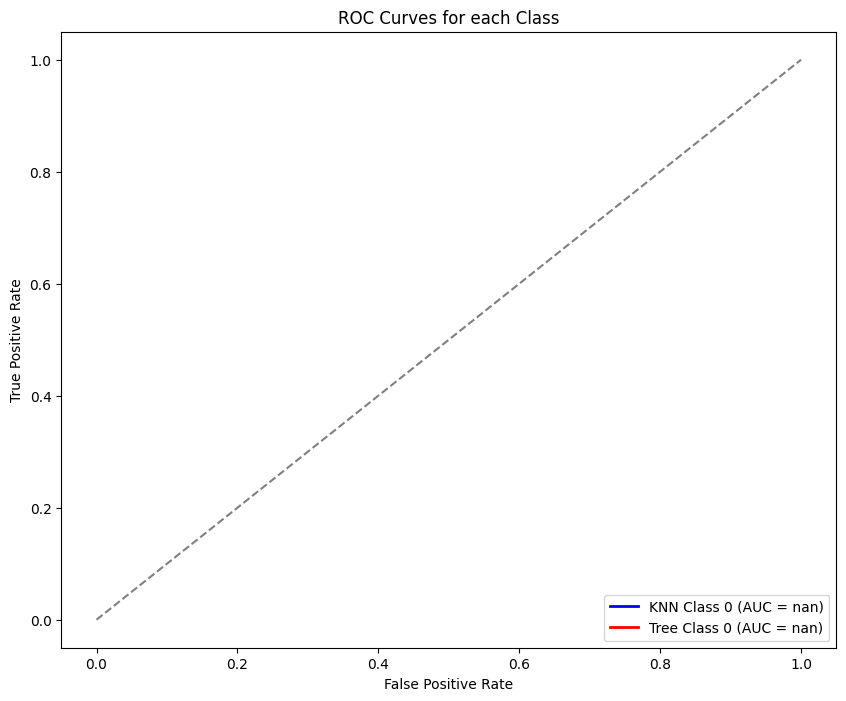

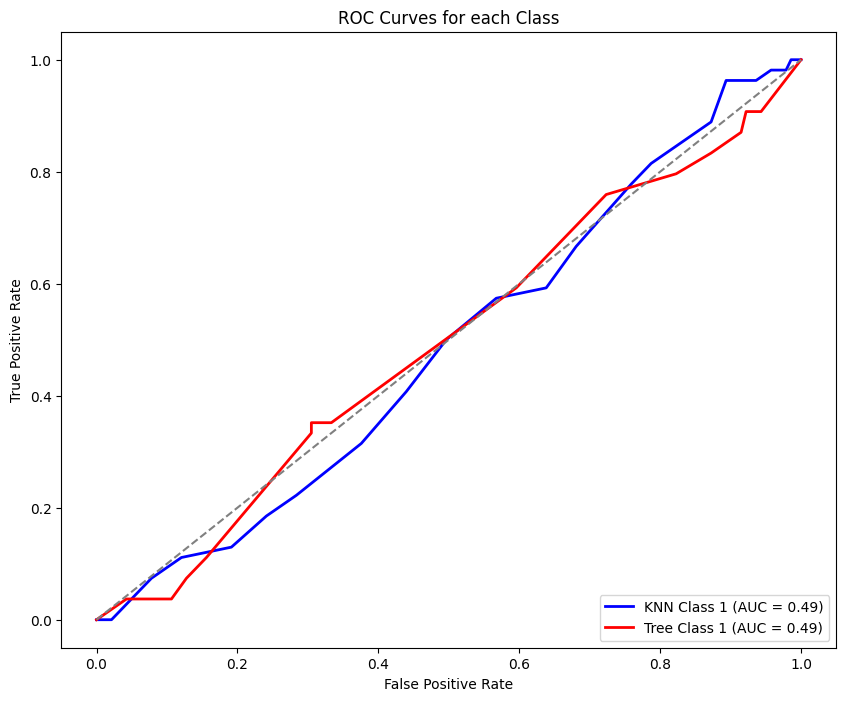

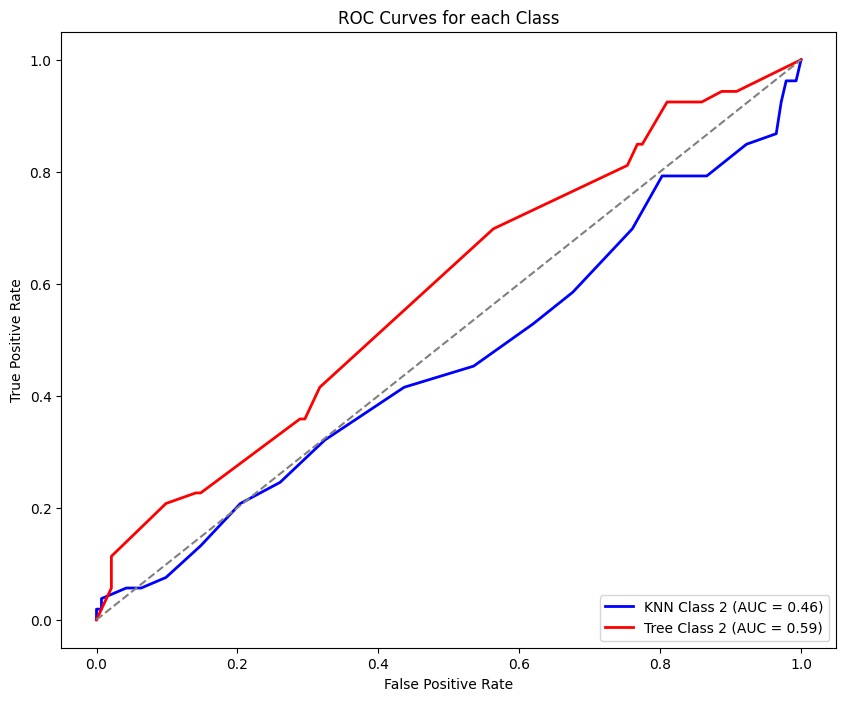

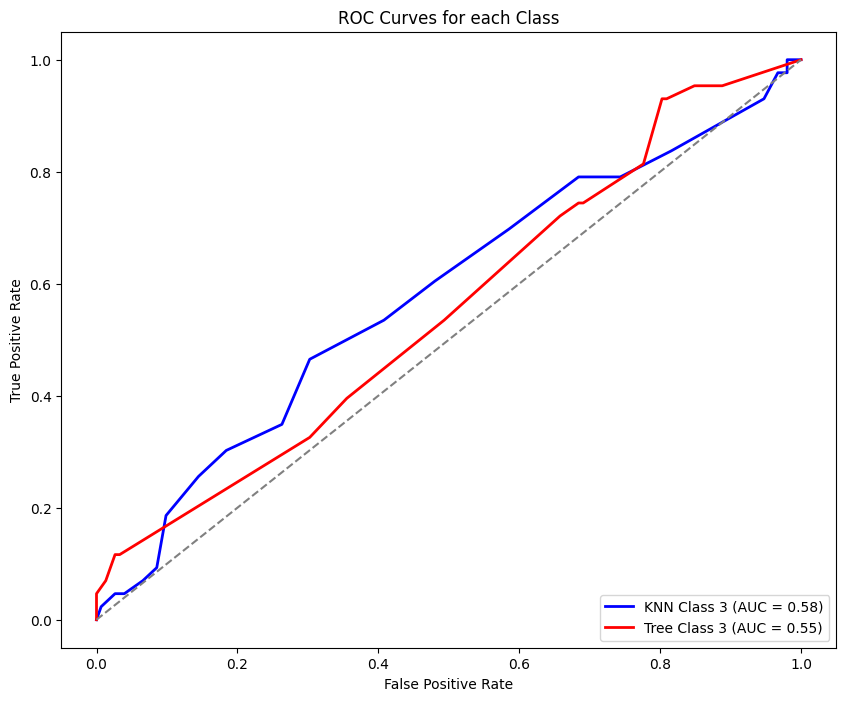

In [395]:


for i in range(4):
    plt.figure(figsize=(10, 8))
    fpr_knn, tpr_knn, _ = roc_curve(Y_test_bin[:, i], knn_test_probs[:, i])
    auc_knn = auc(fpr_knn, tpr_knn)
    
    fpr_tree, tpr_tree, _ = roc_curve(Y_test_bin[:, i], tree_test_probs[:, i])
    auc_tree = auc(fpr_tree, tpr_tree)
    
    plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'KNN Class {i} (AUC = {auc_knn:.2f})')
    plt.plot(fpr_tree, tpr_tree, color='red', lw=2, label=f'Tree Class {i} (AUC = {auc_tree:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for each Class')
    plt.legend(loc='lower right')
    plt.show()


Заметим, что прямые зачастую находятся под диагаональной прямой на графиках roc кривой. Это значит, что классификатор хуже чем случайный, **но чтобы быть хуже чем случайный нужно знать о данных**, поэтому поменяем метки классов. 